# 6.2 Exploring Relationships

Objective: Use visualisations to explore the relationships between variables.

### This script contains the following:

## 1. [Import Libraries](#import_libraries)

## 2. [Selecting Data to Explore](#data_explore)

#### 2.1 [Create a correlation matrix heatmap (colored) - Matplotlib](#Matplotlib)

#### 2.2 [Create a correlation matrix heatmap (colored) - Seaborn](#Seaborn)

## 3. [Scatterplot](#Scatterplot)

## 4. [Pair Plots](#Pair_Plots)

## 5. [Categorical Plot](#Categorical_Plot)

## 6. [Answering Business Questions](#Questions)

#### 6.1 [Do universities with a higher-ranking produce student that are more likely to obtain alumni employment?](#Question_1)

#### 6.2 [Does the number of students at a university effect the quality of education?](#Question_2)

#### 6.3 [Do universities that invest more in innovation produce graduates that are more employable?](#Question_3)

## 7. [Hypothesis](#hypothesis)

# 1.Import Libraries/ Datafrmame <a id='import_libraries'></a>

In [ ]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [ ]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically
%matplotlib inline

In [ ]:
# import cleaned dataframe - create path

path = r'/content/drive/MyDrive/Careerfoundary/Section 6_University_Ranking'

In [ ]:
#import dataframe

df_data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared_Data', 'df_data_cleaned.csv'), index_col = False)

In [ ]:
df_data.head()

,Unnamed: 0,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012
1,1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012
2,2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012
3,3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012
4,4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012


In [ ]:
#Delete unnamed column
df_data = df_data.drop('Unnamed: 0', axis=1)

In [ ]:
#Check the shape of the data
df_data.shape

(2200, 13)

# 2. Create Correlation Heat Maps <a id='data_explore'></a>

In [ ]:
# Selecting Data to Explore  - Select variables from your data set suitable for your exploratory visual analysis.


In [ ]:
df_data.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'patents', 'score', 'year'],
      dtype='object')

In [ ]:
# Create a Subset

In [ ]:
# Data needed: 'world_rank', 'institution', 'country', 'national_rank','quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'patents', 'score'

In [ ]:
# Subset - removed all no numerical data

df = df_data[['world_rank', 'national_rank','quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'patents', 'score']]

# 2.1 Create a correlation matrix heatmap (colored) - Matplotlib<a id='Matplotlib'></a>

In [ ]:
# Create a correlation matrix using pandas

df.corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.698214,-0.549098
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.159440,-0.199756
quality_of_education,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.528120,-0.600541
alumni_employment,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.528219,-0.510374
quality_of_faculty,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.555107,-0.693540
publications,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.671558,-0.522111
influence,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.611811,-0.522837
citations,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.598728,-0.522438
patents,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,1.000000,-0.474810
score,-0.549098,-0.199756,-0.600541,-0.510374,-0.693540,-0.522111,-0.522837,-0.522438,-0.474810,1.000000


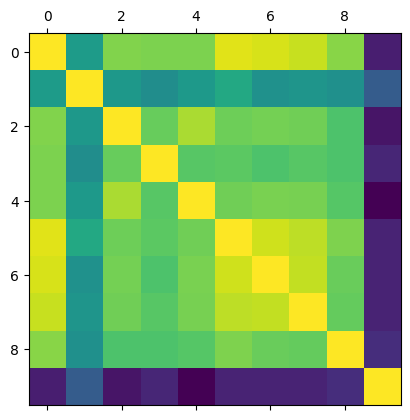

In [ ]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

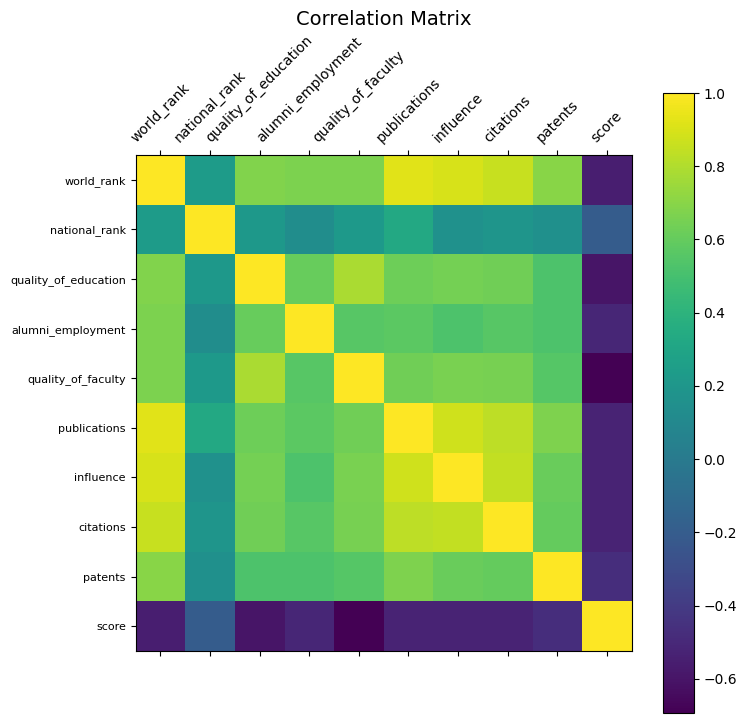

In [ ]:
f = plt.figure(figsize=(8, 8)) # figure size
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

# 2.2 Create a correlation matrix heatmap (colored) - Seaborn <a id='Seaborn'></a>

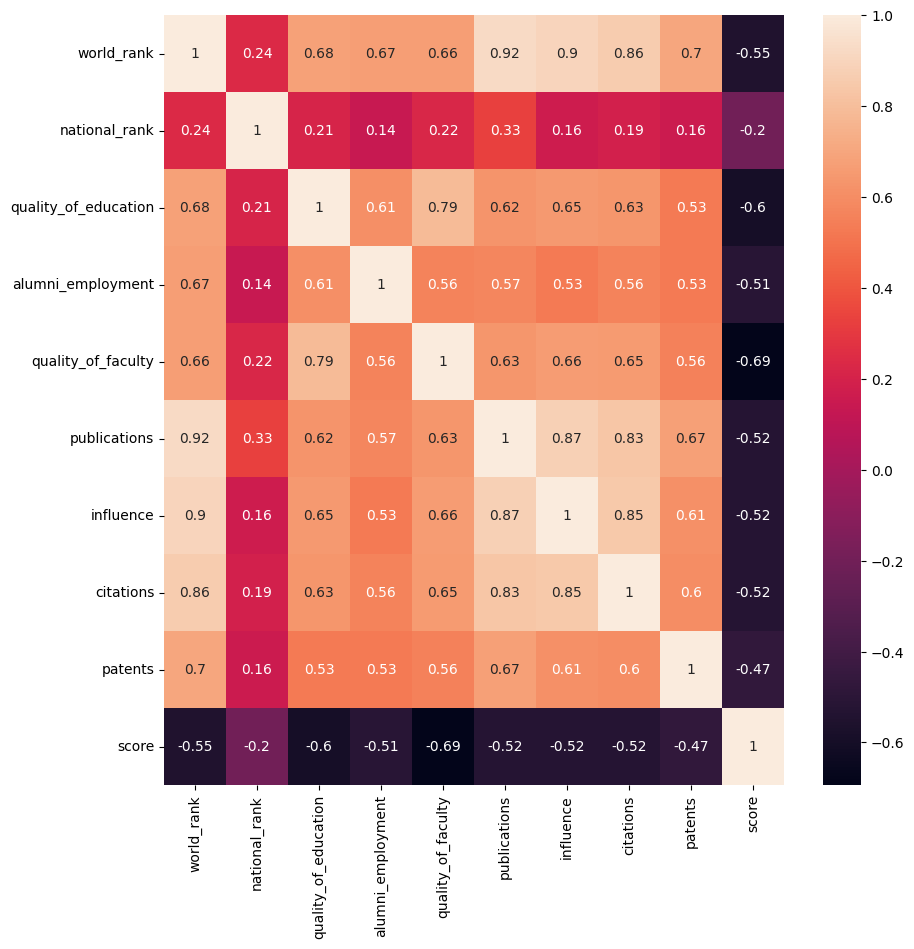

In [ ]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to
#place the correlation coefficients onto the heatmap.

## Score

* Imediately you can see that there is a strong negative correlation between
score and all variables which is expected.

* Score is a pecentage (with 100% being most optimal) that is used to determine the world rank of the universities.

* Therefore, the lower the university ranking in terms of number (with 1 being the most optimal) the higher the score.

## World_rank

* There is a strong postive correlation between world rank and variables influence, citations and patents.

* influence and patents refer to universities R&D while citations is the number of students at the univeristy.

* This means the higher the univeristy rank the more investment in R&D (higher rank for influence and citations).

* Also, the more students the higher the world_rank (citations).

## Quality_of_education

* There are a number of variables that have a strong correlation with quality_of_education.

* Noteable quality_of_faculty has a strong postive correlation with quality_of_education.

* This mean the higher the quality of faculty ranking(with 1 being the most optimal) the higher the quality of education rating.

## Influence, citation an publication

* It is not suprising that there is a very strong positive correlation between these variables as they all refer to R&D.

* It will be interesing to explore this realtionship further.


# 3. Scatterplot<a id='Scatterplot'></a>

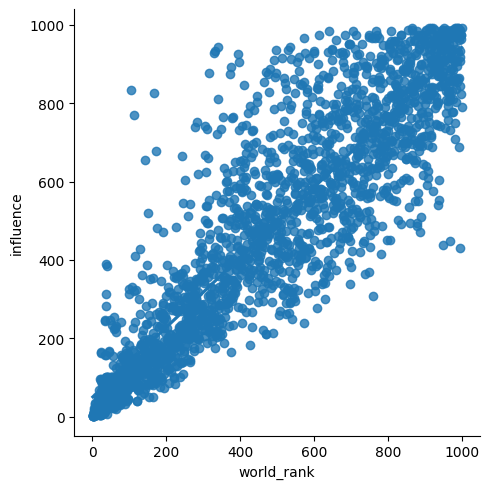

In [ ]:
# Relationship between world rank and influence
sns.lmplot(x = 'world_rank', y = 'influence', data = df)

In [ ]:
# We can see there is very strong postive correlation between world_rank and influence (assesses and compares universities based on the impact and influence of their research and academic work).
# The higher the world rank (closer to 1) the higher the influence rank (closer to 1)

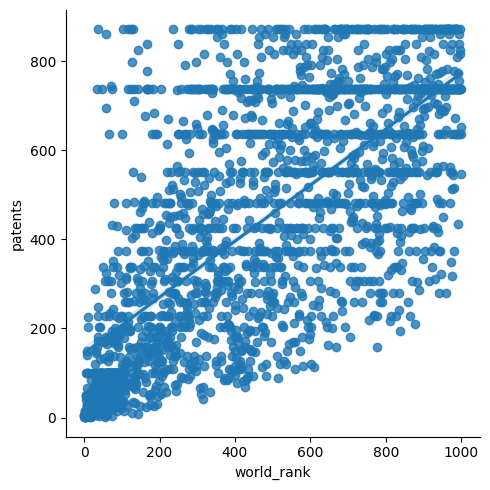

In [ ]:
# Relationship between world rank and patents
sns.lmplot(x = 'world_rank', y = 'patents', data = df)

In [ ]:
# We can see there is some positive correlation between world_rank and patents however there is a very large variance in the data points.
# This relationship is not as strong.

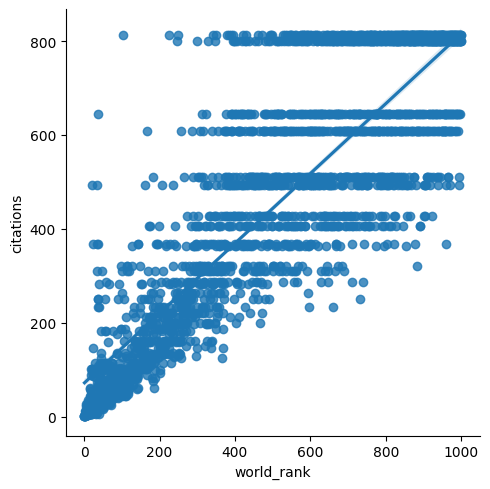

In [ ]:
# Relationship between world_rank and citations
sns.lmplot(x = 'world_rank', y = 'citations', data = df)

In [ ]:
# We can  see there is positive correlation between world_rank and citations (number of students) however this correlation is strongest among the top ranked universities (smaller variance).
# As you reach the lower ranked university there is a large variance in data points.

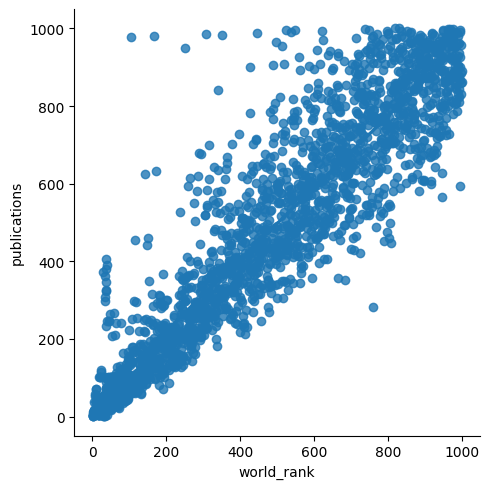

In [ ]:
# Relationship between world rank and publications
sns.lmplot(x = 'world_rank', y = 'publications', data = df)

In [ ]:
# We can see there is a very strong positive relationship between world rank and publications (The number of research publications they have produced).
# The higher the rank of publications produced the higher the world university rank.

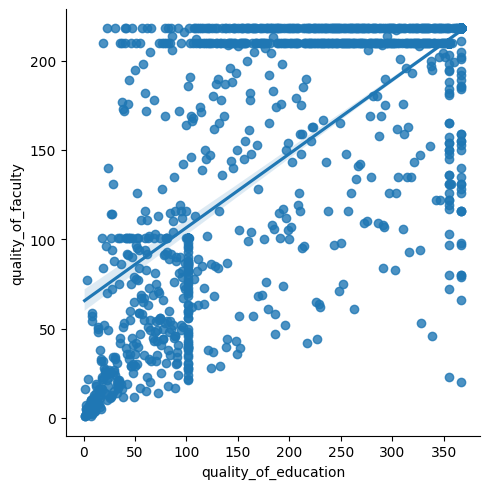

In [ ]:
# Relationship between quality of education and quality of faculty
sns.lmplot(x = 'quality_of_education', y = 'quality_of_faculty', data = df)

In [ ]:
# There is not a strong rlationship betweent these variables.

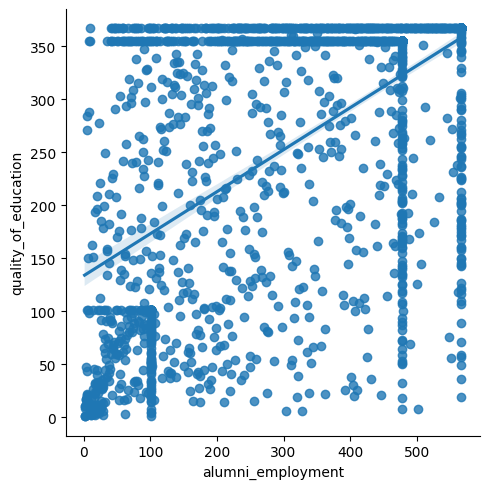

In [ ]:
# Relationship between alumni employment and quality of education
sns.lmplot(x = 'alumni_employment', y = 'quality_of_education', data = df)

In [ ]:
# There is not a strong rlationship betweent these variables.

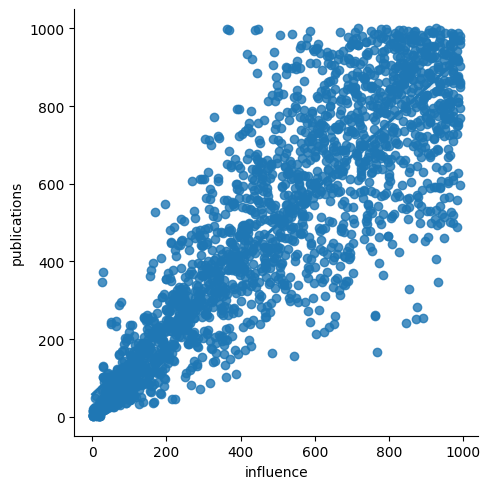

In [ ]:
# Relationship between influence and publications
sns.lmplot(x = 'influence', y = 'publications', data = df)

In [ ]:
# We can see a very strong positve correlation between influence and publications.
# The higher the rank of publications (The number of research publications they have produced) the higher the rank of influence (impact and influence of their research and academic work).

# 4. Pair Plots <a id='Pair_Plots'></a>

In [ ]:
df_data.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'patents', 'score', 'year'],
      dtype='object')

In [ ]:
df_sub = df[['world_rank', 'influence', 'publications', 'patents', 'alumni_employment']]

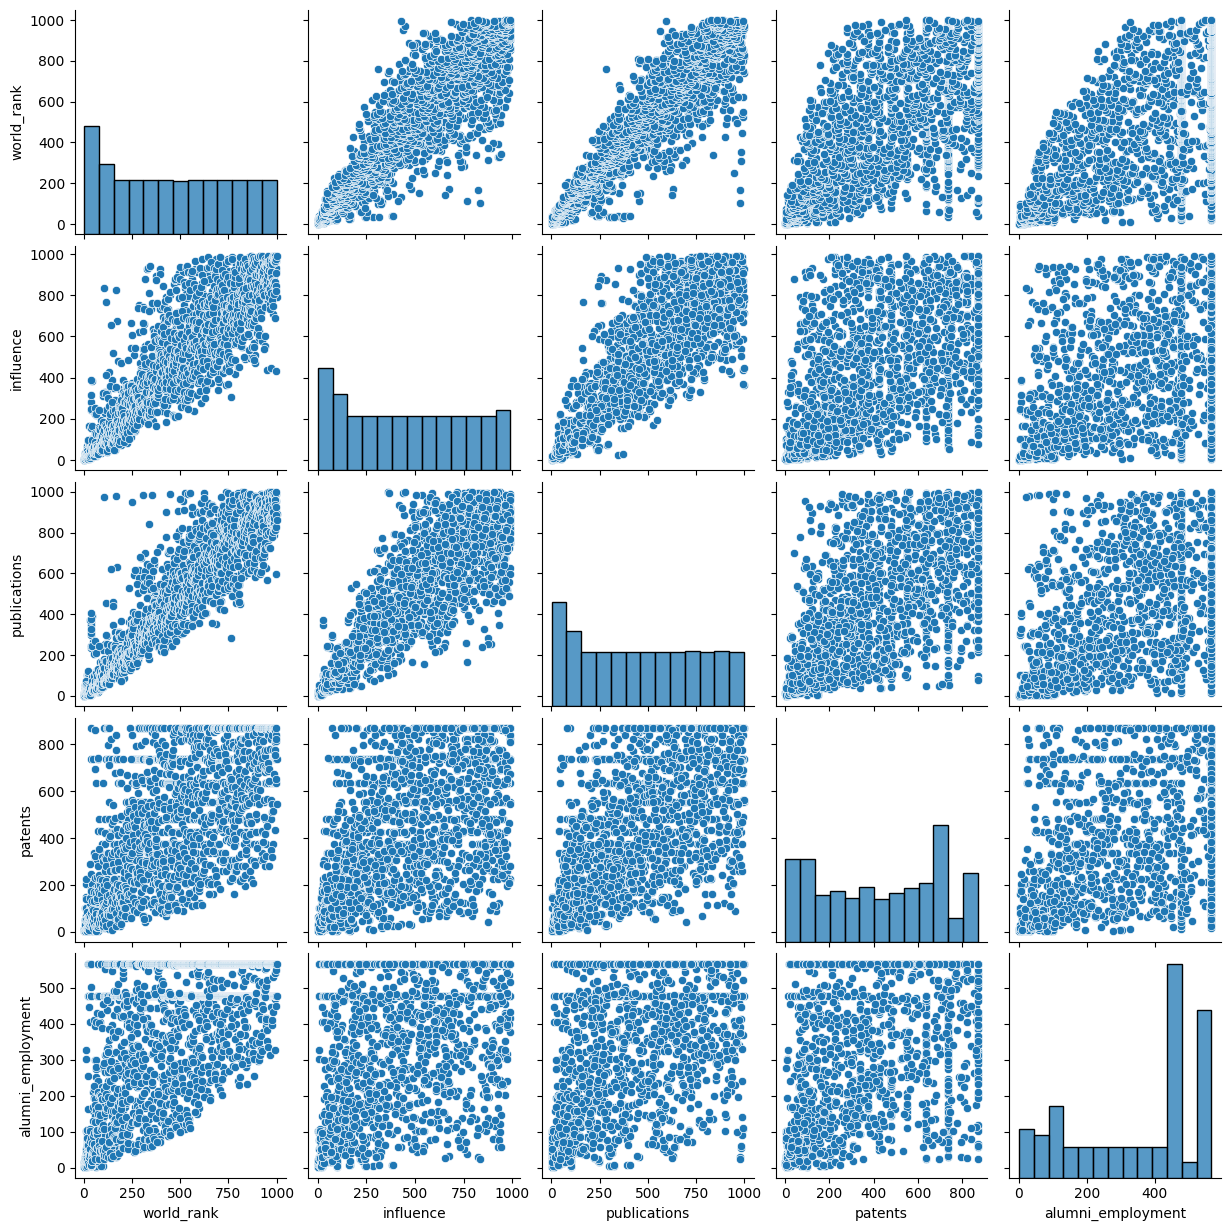

In [ ]:
g = sns.pairplot(df_sub)

In [ ]:
# I have decided to further explore the relationship between university rankings and R&D influence, publications and patents.

# We can see there is a strong postive correlation between world rank and influence, publications and patents.

# There is also a strong positive correlations between influence and publications.


# 5. Categorical Plot <a id='Categorical_Plot'></a>

Use a histogram to visualize the distribution of the variables to determine sensible categories.

<Axes: xlabel='world_rank', ylabel='Count'>

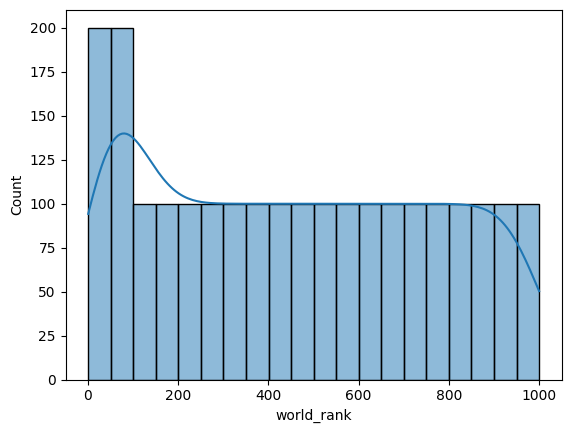

In [ ]:
# histogram for university world_ranking
sns.histplot(df_sub['world_rank'], bins = 20, kde = True)

In [ ]:
df_data.loc[df_data['world_rank'] < 250, 'Ranking_Category'] = 'Top_Rank_University'

In [ ]:
df_data.loc[(df_data['world_rank'] >= 250) & (df_data['world_rank'] < 800), 'Ranking_Category'] = 'Mid_Rank_University'

In [ ]:
df_data.loc[df_data['world_rank'] >= 800, 'Ranking_Category'] = 'Low_Rank_University'

In [ ]:
df_data.shape

(2200, 14)

In [ ]:
df_data['Ranking_Category'].value_counts(dropna = False)

,count
Ranking_Category,
Mid_Rank_University,1100
Top_Rank_University,698
Low_Rank_University,402


In [ ]:
df_data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,Ranking_Category
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012,Top_Rank_University
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012,Top_Rank_University
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012,Top_Rank_University
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012,Top_Rank_University
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012,Top_Rank_University


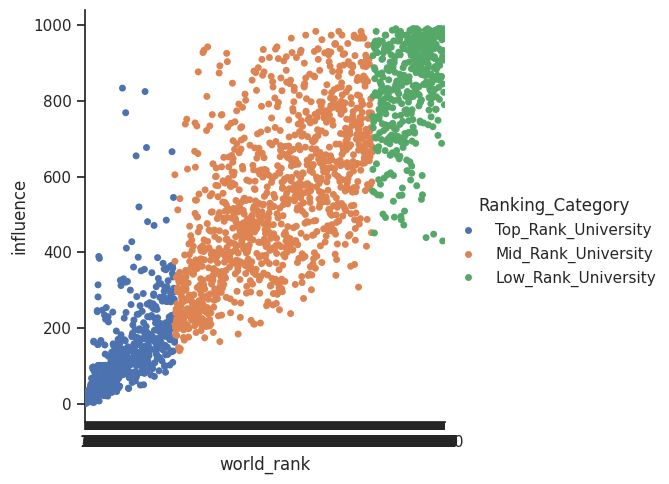

In [ ]:
# Create category plot
sns.set(style="ticks")
g = sns.catplot(x="world_rank", y="influence", hue="Ranking_Category", data=df_data)


In [ ]:
# The graph clearly shows that there is a very strong positive correlation betwee world rank and influence.
# Universities in the world top rank are also among the top ranking univerities in terms of influence.

# 6. Answering Business Questions<a id='Questions'></a>

# 6.1 Do universities with a higher-ranking produce student that are more likely to obtain alumni employment?<a id='Question_1'></a>

In [ ]:
# When looking at the correlation heat map we can see there is strong positive correlation between world rank and alumni employement 0.67.
# We can still see there is some positive correlation bewteen variables of the scatter graph however the variance is large.

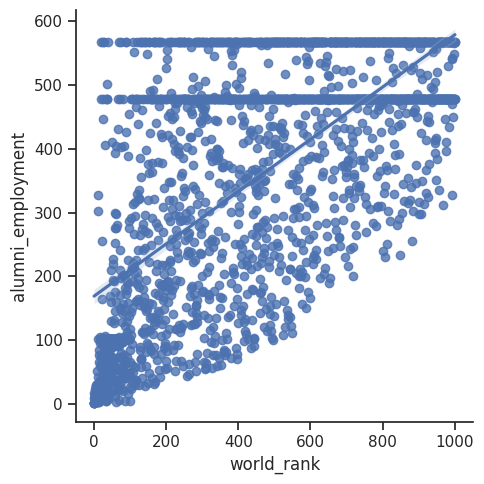

In [ ]:
# Relationship between world_rank and alumni employment
sns.lmplot(x = 'world_rank', y = 'alumni_employment', data = df)

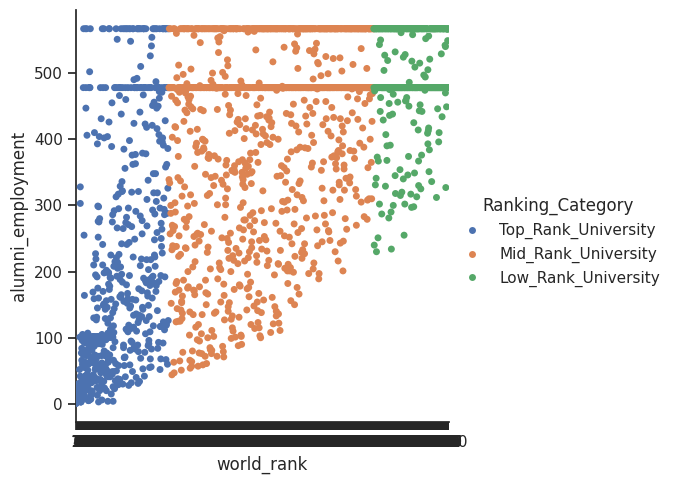

In [ ]:
sns.set(style="ticks")
g = sns.catplot(x="world_rank", y="alumni_employment", hue="Ranking_Category", data=df_data)

# When we include the university rank categories we can see that the higher rank univeristies have higher alumi employment rates.

# 6.2 Does the number of students at a university effect the quality of education?<a id='Question_2'></a>

In [ ]:
# When looking at the correlation heat map we can see there is strong positive correlation between citations and quality of education 0.63.
# However upon further investigation we can see on the scattergraph that the variance is very large and there arer many outliers.
# Therefore the relationship between varaibles is not strong.

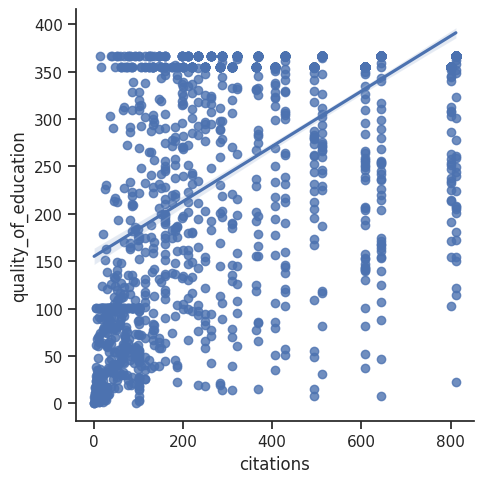

In [ ]:
sns.lmplot(x = 'citations', y = 'quality_of_education', data = df)

# 6.3 Do universities that invest more in innovation produce graduates that are more employable?<a id='Question_3'></a>

In [ ]:
# The variables that indicate innovation are publications, influence and patents
# We can see from the correlation heat map there is positive correaltion bewteen alumni employment and these variable.

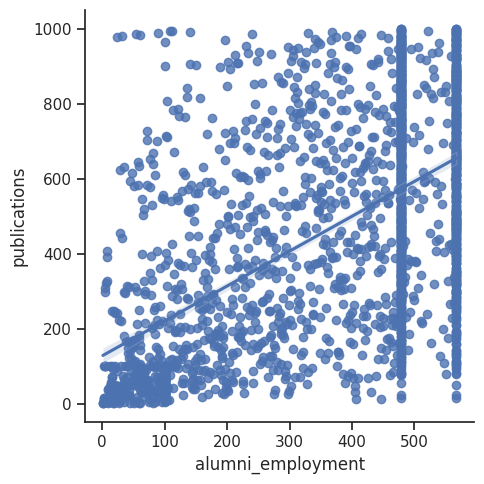

In [ ]:
# Relationship between alumni employment and publications.
sns.lmplot(x = 'alumni_employment', y = 'publications', data = df)

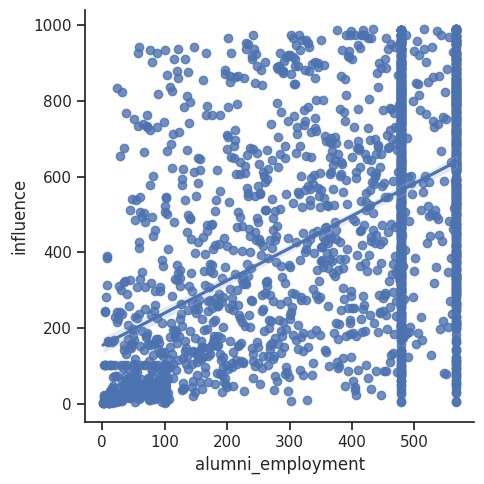

In [ ]:
# Relationship between alumni employment and influence.
sns.lmplot(x = 'alumni_employment', y = 'influence', data = df)

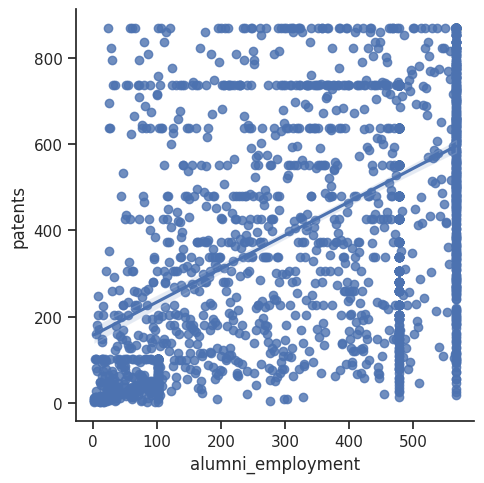

In [ ]:
# Relationship between alumni employment and patents.
sns.lmplot(x = 'alumni_employment', y = 'patents', data = df)

# 7. Hypothesis <a id='hypothesis'></a>

From my analysis, I have found that there is a very strong relationshiop between universities R&D ranking (publications, influence and publications) and the universities world rank. There my hypothsis is:

# Univeristies that invest more in R&D have a higher overall ranking across the world.

In [ ]:
# Export dataset

In [ ]:
df_data.to_csv(os.path.join(path,'02 Data', 'Prepared_Data', 'df_data_cleaned_flags.csv'))